## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  45.338609   198.913456  0.629009  9.444216  1.288391
1  16.094822   391.032264  0.957566  7.538331  1.456680
2  46.869550  1209.311453  0.791072  4.211359  1.482921
3  65.100814   828.614878  0.500569  4.505235  1.439123
4   6.895844  1538.987520  0.147407  2.300100  1.595756


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.78394 | train_mse: 10.05964| train_mae: 2.07603 |  0:00:00s
epoch 1  | loss: 0.83066 | train_mse: 3.5722  | train_mae: 1.34583 |  0:00:00s
epoch 2  | loss: 0.66718 | train_mse: 1.31036 | train_mae: 0.86981 |  0:00:00s


epoch 3  | loss: 0.41491 | train_mse: 2.09936 | train_mae: 1.01805 |  0:00:00s
epoch 4  | loss: 0.40669 | train_mse: 2.75847 | train_mae: 1.08021 |  0:00:00s
epoch 5  | loss: 0.43968 | train_mse: 2.51859 | train_mae: 1.05618 |  0:00:00s
epoch 6  | loss: 0.30653 | train_mse: 1.69751 | train_mae: 0.9205  |  0:00:00s


epoch 7  | loss: 0.33622 | train_mse: 0.71514 | train_mae: 0.66381 |  0:00:00s
epoch 8  | loss: 0.32286 | train_mse: 0.34917 | train_mae: 0.44848 |  0:00:00s
epoch 9  | loss: 0.35472 | train_mse: 0.30058 | train_mae: 0.41695 |  0:00:00s


epoch 10 | loss: 0.20205 | train_mse: 1.12961 | train_mae: 0.7454  |  0:00:00s
epoch 11 | loss: 0.22262 | train_mse: 2.78323 | train_mae: 1.09691 |  0:00:00s
epoch 12 | loss: 0.34173 | train_mse: 1.72414 | train_mae: 0.94803 |  0:00:01s


epoch 13 | loss: 0.30619 | train_mse: 2.15634 | train_mae: 1.02348 |  0:00:01s
epoch 14 | loss: 0.25943 | train_mse: 2.86275 | train_mae: 1.09958 |  0:00:01s
epoch 15 | loss: 0.23562 | train_mse: 1.52733 | train_mae: 0.82759 |  0:00:01s


epoch 16 | loss: 0.34052 | train_mse: 1.11077 | train_mae: 0.7065  |  0:00:01s
epoch 17 | loss: 0.15804 | train_mse: 0.89151 | train_mae: 0.63887 |  0:00:01s
epoch 18 | loss: 0.22439 | train_mse: 0.87198 | train_mae: 0.63756 |  0:00:01s


epoch 19 | loss: 0.13483 | train_mse: 0.70118 | train_mae: 0.58628 |  0:00:01s
epoch 20 | loss: 0.11485 | train_mse: 0.72456 | train_mae: 0.58517 |  0:00:01s
epoch 21 | loss: 0.13118 | train_mse: 0.70726 | train_mae: 0.58776 |  0:00:01s


epoch 22 | loss: 0.10085 | train_mse: 0.54719 | train_mae: 0.52067 |  0:00:01s
epoch 23 | loss: 0.42046 | train_mse: 0.55249 | train_mae: 0.52676 |  0:00:02s


epoch 24 | loss: 0.13476 | train_mse: 0.4737  | train_mae: 0.47864 |  0:00:02s
epoch 25 | loss: 0.13209 | train_mse: 0.39838 | train_mae: 0.44049 |  0:00:02s
epoch 26 | loss: 0.24636 | train_mse: 0.28194 | train_mae: 0.36512 |  0:00:02s


epoch 27 | loss: 0.14067 | train_mse: 0.33519 | train_mae: 0.40046 |  0:00:02s
epoch 28 | loss: 0.10686 | train_mse: 0.52087 | train_mae: 0.48276 |  0:00:02s
epoch 29 | loss: 0.2627  | train_mse: 0.46052 | train_mae: 0.45068 |  0:00:02s


epoch 30 | loss: 0.15303 | train_mse: 0.34594 | train_mae: 0.39279 |  0:00:02s
epoch 31 | loss: 0.3025  | train_mse: 0.27032 | train_mae: 0.35023 |  0:00:02s
epoch 32 | loss: 0.2429  | train_mse: 0.26343 | train_mae: 0.35113 |  0:00:02s
epoch 33 | loss: 0.26511 | train_mse: 0.28103 | train_mae: 0.36291 |  0:00:02s


epoch 34 | loss: 0.16214 | train_mse: 0.21465 | train_mae: 0.33404 |  0:00:02s
epoch 35 | loss: 0.14447 | train_mse: 0.1853  | train_mae: 0.31153 |  0:00:03s
epoch 36 | loss: 0.10003 | train_mse: 0.24079 | train_mae: 0.30455 |  0:00:03s


epoch 37 | loss: 0.14181 | train_mse: 0.22299 | train_mae: 0.30473 |  0:00:03s
epoch 38 | loss: 0.14293 | train_mse: 0.15351 | train_mae: 0.27035 |  0:00:03s
epoch 39 | loss: 0.13469 | train_mse: 0.08099 | train_mae: 0.22007 |  0:00:03s


epoch 40 | loss: 0.10435 | train_mse: 0.08691 | train_mae: 0.2227  |  0:00:03s
epoch 41 | loss: 0.10499 | train_mse: 0.10557 | train_mae: 0.25566 |  0:00:03s
epoch 42 | loss: 0.15888 | train_mse: 0.16014 | train_mae: 0.30699 |  0:00:03s
epoch 43 | loss: 0.18639 | train_mse: 0.19048 | train_mae: 0.32508 |  0:00:03s


epoch 44 | loss: 0.14436 | train_mse: 0.12939 | train_mae: 0.27728 |  0:00:03s
epoch 45 | loss: 0.12396 | train_mse: 0.07834 | train_mae: 0.22225 |  0:00:03s
epoch 46 | loss: 0.1014  | train_mse: 0.06886 | train_mae: 0.20309 |  0:00:03s
epoch 47 | loss: 0.22367 | train_mse: 0.07261 | train_mae: 0.21865 |  0:00:03s


epoch 48 | loss: 0.12446 | train_mse: 0.08276 | train_mae: 0.21937 |  0:00:03s
epoch 49 | loss: 0.09614 | train_mse: 0.07583 | train_mae: 0.21522 |  0:00:04s
epoch 50 | loss: 0.22657 | train_mse: 0.05763 | train_mae: 0.18957 |  0:00:04s


epoch 51 | loss: 0.16102 | train_mse: 0.06983 | train_mae: 0.20161 |  0:00:04s
epoch 52 | loss: 0.1096  | train_mse: 0.06257 | train_mae: 0.19541 |  0:00:04s
epoch 53 | loss: 0.13159 | train_mse: 0.05854 | train_mae: 0.19966 |  0:00:04s
epoch 54 | loss: 0.31363 | train_mse: 0.144   | train_mae: 0.25896 |  0:00:04s


epoch 55 | loss: 0.1329  | train_mse: 0.13379 | train_mae: 0.25256 |  0:00:04s
epoch 56 | loss: 0.20318 | train_mse: 0.12007 | train_mae: 0.25292 |  0:00:04s
epoch 57 | loss: 0.08697 | train_mse: 0.11846 | train_mae: 0.24783 |  0:00:04s
epoch 58 | loss: 0.10446 | train_mse: 0.25607 | train_mae: 0.31457 |  0:00:04s


epoch 59 | loss: 0.20642 | train_mse: 0.18987 | train_mae: 0.29914 |  0:00:04s
epoch 60 | loss: 0.27191 | train_mse: 0.14448 | train_mae: 0.27187 |  0:00:04s
epoch 61 | loss: 0.21848 | train_mse: 0.12175 | train_mae: 0.25445 |  0:00:04s
epoch 62 | loss: 0.09492 | train_mse: 0.11717 | train_mae: 0.24938 |  0:00:04s


epoch 63 | loss: 0.15414 | train_mse: 0.10526 | train_mae: 0.24299 |  0:00:04s
epoch 64 | loss: 0.09639 | train_mse: 0.08091 | train_mae: 0.219   |  0:00:05s
epoch 65 | loss: 0.2023  | train_mse: 0.06898 | train_mae: 0.20408 |  0:00:05s


epoch 66 | loss: 0.10403 | train_mse: 0.07228 | train_mae: 0.21139 |  0:00:05s
epoch 67 | loss: 0.14461 | train_mse: 0.10333 | train_mae: 0.23939 |  0:00:05s
epoch 68 | loss: 0.1634  | train_mse: 0.12126 | train_mae: 0.25481 |  0:00:05s


epoch 69 | loss: 0.15238 | train_mse: 0.09349 | train_mae: 0.23389 |  0:00:05s
epoch 70 | loss: 0.19354 | train_mse: 0.06398 | train_mae: 0.20086 |  0:00:05s
epoch 71 | loss: 0.07972 | train_mse: 0.05718 | train_mae: 0.191   |  0:00:05s
epoch 72 | loss: 0.07244 | train_mse: 0.06294 | train_mae: 0.19586 |  0:00:05s


epoch 73 | loss: 0.11716 | train_mse: 0.0974  | train_mae: 0.22773 |  0:00:05s
epoch 74 | loss: 0.1964  | train_mse: 0.09251 | train_mae: 0.22165 |  0:00:05s
epoch 75 | loss: 0.32229 | train_mse: 0.08179 | train_mae: 0.21515 |  0:00:05s
epoch 76 | loss: 0.12195 | train_mse: 0.06572 | train_mae: 0.20103 |  0:00:05s


epoch 77 | loss: 0.13402 | train_mse: 0.12236 | train_mae: 0.24253 |  0:00:05s
epoch 78 | loss: 0.09922 | train_mse: 0.0897  | train_mae: 0.22141 |  0:00:05s
epoch 79 | loss: 0.17205 | train_mse: 0.16162 | train_mae: 0.24816 |  0:00:06s


epoch 80 | loss: 0.12413 | train_mse: 0.07686 | train_mae: 0.21466 |  0:00:06s
epoch 81 | loss: 0.07632 | train_mse: 0.0574  | train_mae: 0.18741 |  0:00:06s
epoch 82 | loss: 0.29581 | train_mse: 0.06462 | train_mae: 0.19785 |  0:00:06s
epoch 83 | loss: 0.11297 | train_mse: 0.05931 | train_mae: 0.19043 |  0:00:06s


epoch 84 | loss: 0.07931 | train_mse: 0.07589 | train_mae: 0.2109  |  0:00:06s
epoch 85 | loss: 0.14137 | train_mse: 0.07581 | train_mae: 0.20895 |  0:00:06s
epoch 86 | loss: 0.08487 | train_mse: 0.06351 | train_mae: 0.189   |  0:00:06s


epoch 87 | loss: 0.07217 | train_mse: 0.05144 | train_mae: 0.17773 |  0:00:06s
epoch 88 | loss: 0.21705 | train_mse: 0.05069 | train_mae: 0.17854 |  0:00:06s
epoch 89 | loss: 0.13232 | train_mse: 0.05218 | train_mae: 0.18003 |  0:00:06s


epoch 90 | loss: 0.13486 | train_mse: 0.06633 | train_mae: 0.19848 |  0:00:06s
epoch 91 | loss: 0.20718 | train_mse: 0.05583 | train_mae: 0.18967 |  0:00:06s
epoch 92 | loss: 0.09209 | train_mse: 0.07054 | train_mae: 0.20831 |  0:00:07s
epoch 93 | loss: 0.13386 | train_mse: 0.07012 | train_mae: 0.20998 |  0:00:07s


epoch 94 | loss: 0.11772 | train_mse: 0.06381 | train_mae: 0.20575 |  0:00:07s
epoch 95 | loss: 0.17772 | train_mse: 0.05571 | train_mae: 0.1847  |  0:00:07s
epoch 96 | loss: 0.17414 | train_mse: 0.07982 | train_mae: 0.19727 |  0:00:07s
epoch 97 | loss: 0.08097 | train_mse: 0.07293 | train_mae: 0.1895  |  0:00:07s


epoch 98 | loss: 0.1298  | train_mse: 0.07169 | train_mae: 0.1899  |  0:00:07s
epoch 99 | loss: 0.16712 | train_mse: 0.06513 | train_mae: 0.18584 |  0:00:07s
epoch 100| loss: 0.13659 | train_mse: 0.06597 | train_mae: 0.19808 |  0:00:07s
epoch 101| loss: 0.08815 | train_mse: 0.05193 | train_mae: 0.17967 |  0:00:07s


epoch 102| loss: 0.07988 | train_mse: 0.05222 | train_mae: 0.18342 |  0:00:07s
epoch 103| loss: 0.12655 | train_mse: 0.05274 | train_mae: 0.18285 |  0:00:07s
epoch 104| loss: 0.1937  | train_mse: 0.05296 | train_mae: 0.17853 |  0:00:07s
epoch 105| loss: 0.06884 | train_mse: 0.049   | train_mae: 0.17834 |  0:00:07s


epoch 106| loss: 0.16964 | train_mse: 0.05399 | train_mae: 0.18453 |  0:00:07s
epoch 107| loss: 0.21576 | train_mse: 0.08714 | train_mae: 0.21629 |  0:00:08s
epoch 108| loss: 0.17887 | train_mse: 0.06453 | train_mae: 0.19241 |  0:00:08s


epoch 109| loss: 0.13854 | train_mse: 0.06932 | train_mae: 0.19654 |  0:00:08s
epoch 110| loss: 0.06106 | train_mse: 0.06135 | train_mae: 0.18316 |  0:00:08s
epoch 111| loss: 0.17796 | train_mse: 0.05105 | train_mae: 0.17466 |  0:00:08s
epoch 112| loss: 0.07732 | train_mse: 0.04835 | train_mae: 0.17555 |  0:00:08s


epoch 113| loss: 0.09043 | train_mse: 0.04748 | train_mae: 0.17564 |  0:00:08s
epoch 114| loss: 0.08998 | train_mse: 0.05619 | train_mae: 0.17688 |  0:00:08s
epoch 115| loss: 0.38806 | train_mse: 0.06387 | train_mae: 0.18558 |  0:00:08s
epoch 116| loss: 0.10775 | train_mse: 0.06673 | train_mae: 0.19071 |  0:00:08s


epoch 117| loss: 0.08776 | train_mse: 0.05809 | train_mae: 0.18442 |  0:00:08s
epoch 118| loss: 0.10434 | train_mse: 0.0618  | train_mae: 0.18237 |  0:00:08s
epoch 119| loss: 0.15637 | train_mse: 0.05505 | train_mae: 0.17499 |  0:00:08s
epoch 120| loss: 0.23617 | train_mse: 0.0702  | train_mae: 0.19234 |  0:00:08s


epoch 121| loss: 0.09225 | train_mse: 0.1015  | train_mae: 0.21766 |  0:00:09s
epoch 122| loss: 0.15399 | train_mse: 0.0843  | train_mae: 0.21099 |  0:00:09s
epoch 123| loss: 0.07537 | train_mse: 0.07    | train_mae: 0.20227 |  0:00:09s


epoch 124| loss: 0.09801 | train_mse: 0.07838 | train_mae: 0.212   |  0:00:09s
epoch 125| loss: 0.08523 | train_mse: 0.1043  | train_mae: 0.22554 |  0:00:09s
epoch 126| loss: 0.23005 | train_mse: 0.09721 | train_mae: 0.22071 |  0:00:09s
epoch 127| loss: 0.08369 | train_mse: 0.04529 | train_mae: 0.16951 |  0:00:09s


epoch 128| loss: 0.12225 | train_mse: 0.07055 | train_mae: 0.20481 |  0:00:09s
epoch 129| loss: 0.11641 | train_mse: 0.07118 | train_mae: 0.19628 |  0:00:09s
epoch 130| loss: 0.09341 | train_mse: 0.06205 | train_mae: 0.19184 |  0:00:09s
epoch 131| loss: 0.08594 | train_mse: 0.07844 | train_mae: 0.21294 |  0:00:09s


epoch 132| loss: 0.16064 | train_mse: 0.16696 | train_mae: 0.26375 |  0:00:09s
epoch 133| loss: 0.13387 | train_mse: 0.18583 | train_mae: 0.267   |  0:00:09s
epoch 134| loss: 0.0894  | train_mse: 0.13875 | train_mae: 0.24237 |  0:00:09s
epoch 135| loss: 0.10909 | train_mse: 0.06392 | train_mae: 0.19619 |  0:00:09s


epoch 136| loss: 0.15076 | train_mse: 0.07222 | train_mae: 0.20861 |  0:00:10s
epoch 137| loss: 0.19448 | train_mse: 0.08    | train_mae: 0.21316 |  0:00:10s
epoch 138| loss: 0.11688 | train_mse: 0.06699 | train_mae: 0.20153 |  0:00:10s


epoch 139| loss: 0.11426 | train_mse: 0.08878 | train_mae: 0.23021 |  0:00:10s
epoch 140| loss: 0.29722 | train_mse: 0.12005 | train_mae: 0.26063 |  0:00:10s


epoch 141| loss: 0.10676 | train_mse: 0.09458 | train_mae: 0.24271 |  0:00:10s
epoch 142| loss: 0.13875 | train_mse: 0.07325 | train_mae: 0.21124 |  0:00:10s
epoch 143| loss: 0.15204 | train_mse: 0.07849 | train_mae: 0.21338 |  0:00:10s
epoch 144| loss: 0.09677 | train_mse: 0.0744  | train_mae: 0.20511 |  0:00:10s


epoch 145| loss: 0.07652 | train_mse: 0.06855 | train_mae: 0.20523 |  0:00:10s
epoch 146| loss: 0.13035 | train_mse: 0.07021 | train_mae: 0.20406 |  0:00:10s
epoch 147| loss: 0.09804 | train_mse: 0.06277 | train_mae: 0.19765 |  0:00:10s


epoch 148| loss: 0.07996 | train_mse: 0.06729 | train_mae: 0.20363 |  0:00:10s
epoch 149| loss: 0.07823 | train_mse: 0.06606 | train_mae: 0.20207 |  0:00:11s
epoch 150| loss: 0.08877 | train_mse: 0.05261 | train_mae: 0.18664 |  0:00:11s
epoch 151| loss: 0.1609  | train_mse: 0.04842 | train_mae: 0.17507 |  0:00:11s


epoch 152| loss: 0.17949 | train_mse: 0.05995 | train_mae: 0.19033 |  0:00:11s
epoch 153| loss: 0.08135 | train_mse: 0.05248 | train_mae: 0.18424 |  0:00:11s
epoch 154| loss: 0.13969 | train_mse: 0.05345 | train_mae: 0.185   |  0:00:11s
epoch 155| loss: 0.14571 | train_mse: 0.05865 | train_mae: 0.19021 |  0:00:11s


epoch 156| loss: 0.18067 | train_mse: 0.05921 | train_mae: 0.18964 |  0:00:11s
epoch 157| loss: 0.12664 | train_mse: 0.05795 | train_mae: 0.18612 |  0:00:11s
epoch 158| loss: 0.28561 | train_mse: 0.082   | train_mae: 0.20406 |  0:00:11s


epoch 159| loss: 0.15238 | train_mse: 0.10673 | train_mae: 0.21987 |  0:00:11s
epoch 160| loss: 0.17722 | train_mse: 0.12255 | train_mae: 0.23752 |  0:00:11s
epoch 161| loss: 0.12383 | train_mse: 0.09652 | train_mae: 0.22038 |  0:00:11s
epoch 162| loss: 0.14754 | train_mse: 0.0992  | train_mae: 0.21215 |  0:00:11s


epoch 163| loss: 0.08419 | train_mse: 0.06464 | train_mae: 0.19271 |  0:00:12s
epoch 164| loss: 0.11269 | train_mse: 0.05025 | train_mae: 0.17242 |  0:00:12s
epoch 165| loss: 0.11258 | train_mse: 0.05896 | train_mae: 0.18183 |  0:00:12s


epoch 166| loss: 0.09582 | train_mse: 0.05062 | train_mae: 0.17329 |  0:00:12s
epoch 167| loss: 0.09274 | train_mse: 0.04417 | train_mae: 0.16771 |  0:00:12s
epoch 168| loss: 0.07713 | train_mse: 0.04936 | train_mae: 0.16754 |  0:00:12s


epoch 169| loss: 0.19146 | train_mse: 0.05677 | train_mae: 0.17698 |  0:00:12s
epoch 170| loss: 0.06142 | train_mse: 0.05837 | train_mae: 0.18014 |  0:00:12s
epoch 171| loss: 0.19283 | train_mse: 0.04998 | train_mae: 0.17325 |  0:00:12s
epoch 172| loss: 0.25624 | train_mse: 0.05415 | train_mae: 0.1742  |  0:00:12s


epoch 173| loss: 0.09572 | train_mse: 0.05634 | train_mae: 0.18006 |  0:00:12s
epoch 174| loss: 0.07313 | train_mse: 0.06174 | train_mae: 0.18841 |  0:00:12s
epoch 175| loss: 0.08585 | train_mse: 0.06469 | train_mae: 0.18967 |  0:00:13s


epoch 176| loss: 0.16526 | train_mse: 0.06711 | train_mae: 0.19139 |  0:00:13s
epoch 177| loss: 0.14399 | train_mse: 0.0676  | train_mae: 0.19109 |  0:00:13s
epoch 178| loss: 0.0992  | train_mse: 0.06869 | train_mae: 0.18988 |  0:00:13s


epoch 179| loss: 0.08462 | train_mse: 0.06903 | train_mae: 0.18396 |  0:00:13s
epoch 180| loss: 0.11067 | train_mse: 0.06235 | train_mae: 0.18943 |  0:00:13s
epoch 181| loss: 0.10778 | train_mse: 0.06517 | train_mae: 0.20177 |  0:00:13s
epoch 182| loss: 0.12467 | train_mse: 0.05635 | train_mae: 0.18105 |  0:00:13s


epoch 183| loss: 0.07972 | train_mse: 0.05238 | train_mae: 0.17229 |  0:00:13s
epoch 184| loss: 0.21127 | train_mse: 0.06432 | train_mae: 0.19191 |  0:00:13s
epoch 185| loss: 0.17825 | train_mse: 0.07791 | train_mae: 0.19589 |  0:00:13s
epoch 186| loss: 0.10963 | train_mse: 0.0729  | train_mae: 0.18455 |  0:00:13s


epoch 187| loss: 0.14923 | train_mse: 0.0685  | train_mae: 0.19309 |  0:00:13s
epoch 188| loss: 0.06826 | train_mse: 0.06333 | train_mae: 0.18668 |  0:00:13s
epoch 189| loss: 0.10637 | train_mse: 0.05828 | train_mae: 0.1705  |  0:00:13s


epoch 190| loss: 0.09947 | train_mse: 0.04835 | train_mae: 0.16176 |  0:00:14s
epoch 191| loss: 0.20166 | train_mse: 0.05936 | train_mae: 0.18636 |  0:00:14s
epoch 192| loss: 0.11911 | train_mse: 0.10549 | train_mae: 0.20774 |  0:00:14s


epoch 193| loss: 0.21573 | train_mse: 0.15449 | train_mae: 0.25891 |  0:00:14s
epoch 194| loss: 0.09183 | train_mse: 0.18271 | train_mae: 0.28066 |  0:00:14s
epoch 195| loss: 0.08368 | train_mse: 0.15319 | train_mae: 0.24463 |  0:00:14s
epoch 196| loss: 0.21683 | train_mse: 0.12199 | train_mae: 0.24271 |  0:00:14s


epoch 197| loss: 0.13169 | train_mse: 0.07004 | train_mae: 0.19111 |  0:00:14s
epoch 198| loss: 0.11977 | train_mse: 0.04251 | train_mae: 0.1666  |  0:00:14s
epoch 199| loss: 0.10578 | train_mse: 0.04149 | train_mae: 0.16997 |  0:00:14s
epoch 200| loss: 0.09698 | train_mse: 0.04173 | train_mae: 0.169   |  0:00:14s


epoch 201| loss: 0.07498 | train_mse: 0.05042 | train_mae: 0.17196 |  0:00:14s
epoch 202| loss: 0.15079 | train_mse: 0.08254 | train_mae: 0.20731 |  0:00:14s
epoch 203| loss: 0.17976 | train_mse: 0.09687 | train_mae: 0.21643 |  0:00:14s
epoch 204| loss: 0.1464  | train_mse: 0.1785  | train_mae: 0.2519  |  0:00:14s


epoch 205| loss: 0.14196 | train_mse: 0.18094 | train_mae: 0.24646 |  0:00:15s
epoch 206| loss: 0.13161 | train_mse: 0.14131 | train_mae: 0.21533 |  0:00:15s
epoch 207| loss: 0.09005 | train_mse: 0.08891 | train_mae: 0.19371 |  0:00:15s


epoch 208| loss: 0.13895 | train_mse: 0.05357 | train_mae: 0.17943 |  0:00:15s
epoch 209| loss: 0.05313 | train_mse: 0.04543 | train_mae: 0.16776 |  0:00:15s
epoch 210| loss: 0.08193 | train_mse: 0.05692 | train_mae: 0.17845 |  0:00:15s
epoch 211| loss: 0.10318 | train_mse: 0.12057 | train_mae: 0.22434 |  0:00:15s


epoch 212| loss: 0.2413  | train_mse: 0.12808 | train_mae: 0.238   |  0:00:15s
epoch 213| loss: 0.11522 | train_mse: 0.14995 | train_mae: 0.24504 |  0:00:15s
epoch 214| loss: 0.06797 | train_mse: 0.21695 | train_mae: 0.2715  |  0:00:15s


epoch 215| loss: 0.12816 | train_mse: 0.22948 | train_mae: 0.27681 |  0:00:15s
epoch 216| loss: 0.09885 | train_mse: 0.16944 | train_mae: 0.22868 |  0:00:15s
epoch 217| loss: 0.14909 | train_mse: 0.06728 | train_mae: 0.19032 |  0:00:15s
epoch 218| loss: 0.1507  | train_mse: 0.0417  | train_mae: 0.16068 |  0:00:15s
epoch 219| loss: 0.10081 | train_mse: 0.05346 | train_mae: 0.17501 |  0:00:16s


epoch 220| loss: 0.11269 | train_mse: 0.05868 | train_mae: 0.18481 |  0:00:16s
epoch 221| loss: 0.09673 | train_mse: 0.05493 | train_mae: 0.18385 |  0:00:16s
epoch 222| loss: 0.13915 | train_mse: 0.05221 | train_mae: 0.18236 |  0:00:16s


epoch 223| loss: 0.09279 | train_mse: 0.04972 | train_mae: 0.18016 |  0:00:16s
epoch 224| loss: 0.10752 | train_mse: 0.05184 | train_mae: 0.17755 |  0:00:16s
epoch 225| loss: 0.07235 | train_mse: 0.04707 | train_mae: 0.18248 |  0:00:16s
epoch 226| loss: 0.12785 | train_mse: 0.04637 | train_mae: 0.17732 |  0:00:16s


epoch 227| loss: 0.11413 | train_mse: 0.05198 | train_mae: 0.17825 |  0:00:16s
epoch 228| loss: 0.08436 | train_mse: 0.06855 | train_mae: 0.20073 |  0:00:16s
epoch 229| loss: 0.16307 | train_mse: 0.08025 | train_mae: 0.21217 |  0:00:16s
epoch 230| loss: 0.07064 | train_mse: 0.07152 | train_mae: 0.20215 |  0:00:16s


epoch 231| loss: 0.13785 | train_mse: 0.06441 | train_mae: 0.18725 |  0:00:16s
epoch 232| loss: 0.16332 | train_mse: 0.06888 | train_mae: 0.20075 |  0:00:16s
epoch 233| loss: 0.07901 | train_mse: 0.19778 | train_mae: 0.27822 |  0:00:16s
epoch 234| loss: 0.09964 | train_mse: 0.21525 | train_mae: 0.28971 |  0:00:17s


epoch 235| loss: 0.10708 | train_mse: 0.05739 | train_mae: 0.18768 |  0:00:17s
epoch 236| loss: 0.2689  | train_mse: 0.04726 | train_mae: 0.16812 |  0:00:17s
epoch 237| loss: 0.16409 | train_mse: 0.05259 | train_mae: 0.18004 |  0:00:17s


epoch 238| loss: 0.068   | train_mse: 0.05522 | train_mae: 0.18626 |  0:00:17s
epoch 239| loss: 0.12506 | train_mse: 0.05869 | train_mae: 0.18635 |  0:00:17s
epoch 240| loss: 0.10175 | train_mse: 0.05411 | train_mae: 0.18129 |  0:00:17s
epoch 241| loss: 0.11339 | train_mse: 0.04738 | train_mae: 0.16963 |  0:00:17s


epoch 242| loss: 0.11179 | train_mse: 0.05018 | train_mae: 0.17392 |  0:00:17s
epoch 243| loss: 0.11871 | train_mse: 0.05714 | train_mae: 0.18877 |  0:00:17s
epoch 244| loss: 0.07025 | train_mse: 0.04656 | train_mae: 0.17287 |  0:00:17s
epoch 245| loss: 0.12909 | train_mse: 0.05656 | train_mae: 0.18952 |  0:00:17s


epoch 246| loss: 0.08598 | train_mse: 0.06521 | train_mae: 0.20038 |  0:00:17s
epoch 247| loss: 0.07874 | train_mse: 0.09476 | train_mae: 0.22548 |  0:00:17s
epoch 248| loss: 0.06544 | train_mse: 0.11453 | train_mae: 0.24434 |  0:00:17s
epoch 249| loss: 0.16153 | train_mse: 0.12781 | train_mae: 0.25474 |  0:00:18s


epoch 250| loss: 0.10339 | train_mse: 0.08834 | train_mae: 0.21053 |  0:00:18s
epoch 251| loss: 0.24972 | train_mse: 0.11799 | train_mae: 0.21782 |  0:00:18s
epoch 252| loss: 0.15014 | train_mse: 0.10195 | train_mae: 0.21166 |  0:00:18s


epoch 253| loss: 0.32529 | train_mse: 0.05483 | train_mae: 0.18385 |  0:00:18s
epoch 254| loss: 0.10021 | train_mse: 0.08915 | train_mae: 0.22083 |  0:00:18s
epoch 255| loss: 0.08    | train_mse: 0.12364 | train_mae: 0.24311 |  0:00:18s
epoch 256| loss: 0.25059 | train_mse: 0.13879 | train_mae: 0.25289 |  0:00:18s


epoch 257| loss: 0.0872  | train_mse: 0.07718 | train_mae: 0.21007 |  0:00:18s
epoch 258| loss: 0.1355  | train_mse: 0.05876 | train_mae: 0.19084 |  0:00:18s
epoch 259| loss: 0.09102 | train_mse: 0.05054 | train_mae: 0.17888 |  0:00:18s
epoch 260| loss: 0.15235 | train_mse: 0.04315 | train_mae: 0.16618 |  0:00:18s


epoch 261| loss: 0.05651 | train_mse: 0.04457 | train_mae: 0.16715 |  0:00:18s
epoch 262| loss: 0.10163 | train_mse: 0.05991 | train_mae: 0.18804 |  0:00:18s
epoch 263| loss: 0.20443 | train_mse: 0.05304 | train_mae: 0.18382 |  0:00:19s
epoch 264| loss: 0.23348 | train_mse: 0.04071 | train_mae: 0.16467 |  0:00:19s


epoch 265| loss: 0.08263 | train_mse: 0.04669 | train_mae: 0.18    |  0:00:19s
epoch 266| loss: 0.08891 | train_mse: 0.16852 | train_mae: 0.26206 |  0:00:19s
epoch 267| loss: 0.07469 | train_mse: 0.21174 | train_mae: 0.26314 |  0:00:19s


epoch 268| loss: 0.10851 | train_mse: 0.20967 | train_mae: 0.2735  |  0:00:19s

Early stopping occurred at epoch 268 with best_epoch = 218 and best_train_mae = 0.16068
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

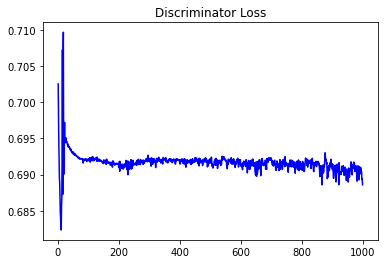

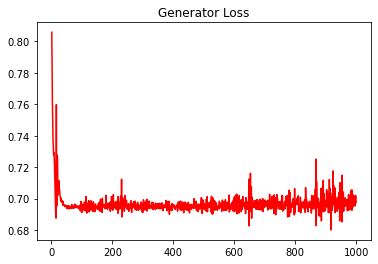

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.611207496549982


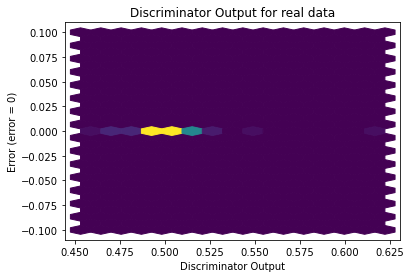

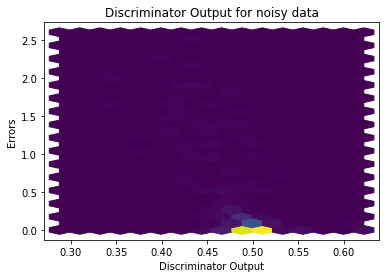

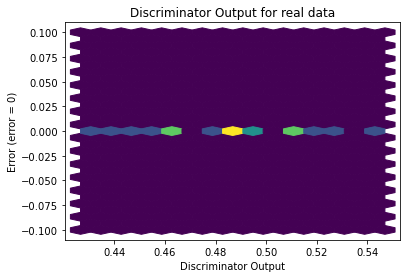

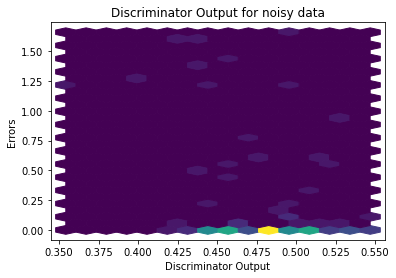

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


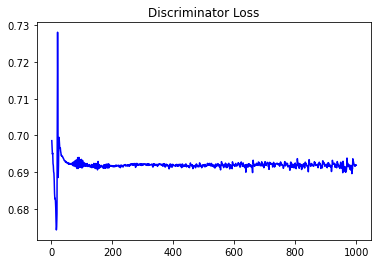

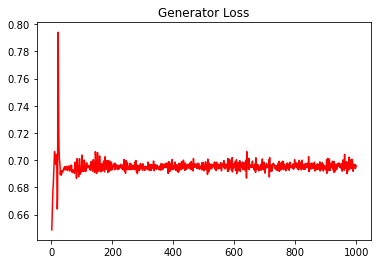

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.47034149012787


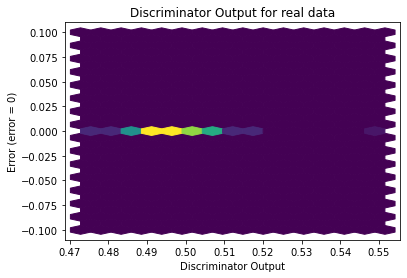

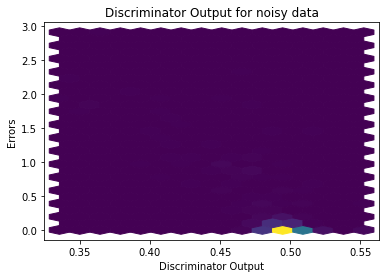

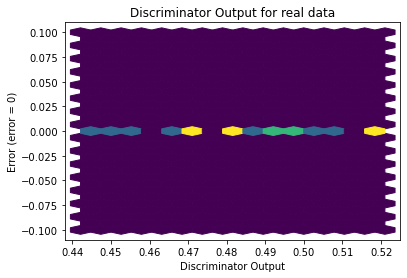

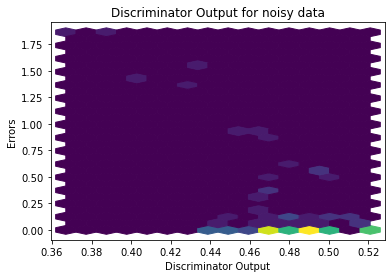

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8511]], requires_grad=True)
